<a href="https://colab.research.google.com/github/C22342081/Applied-Predictive-Analytics-Lab/blob/main/Lab_4_Tree_based_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tree-based Methiods**

In [16]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error ,mean_squared_error,confusion_matrix, classification_report


In [17]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

### **REGRESSION TREES**

In [19]:
url='https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv'
df = pd.read_csv(url).dropna()
df.info()

HTTPError: HTTP Error 404: Not Found

In [ ]:
X = df[['Years', 'Hits']]
y = np.log(df.Salary)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(df.Salary)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)')

### Defining Features (X) and Target (y):

*   X = df[['Years', 'Hits']]:

    These will be used as the input features for the model (explanatory variables).

*   y = np.log(df.Salary):

    Taking the logarithm of a target variable like Salary is a common transformation to:
    *   Handle **skewed distributions**.
    *   **Normalize** the data for better performance in regression models.
    *   Reduce the impact of outliers, especially when the data contains a wide range of salaries.






### Plotting the Histograms:

*   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8)):

    *   Figures with 2 subplots

*   **First Subplot (ax1)**:

    *   ax1.hist(df.Salary):
    Histogram of the original Salary values. It shows the frequency distribution of Salary data, giving insight into its spread, skewness, and range.

    *   ax1.set_xlabel('Salary'): x-axis label

*   **Second Subplot (ax2)**:

    *  ax2.hist(y): Histogram of the log of Salry (y). It shows how the Salary distribution after taking the log., and it typically helps to make a right-skewed distribution more symmetrical.

*  **ax2.set_label('log(Salary)')**: Lable of x-axis





### Key Points

* **Raw Salary**: The original Salary distribution might be **right-skewed**, meaning most salaries are on the lower end, with a few very high salaries (outliers).

* **Log-Transformed Salary**: Taking the log of the Salary tends to **compress the larger values** and **spread out the smaller values**, making the distribution more **normal** or symmetric. This can be useful for regression modeling because many algorithms perform better with normally distributed data.

In [ ]:

tree_model = DecisionTreeRegressor(max_leaf_nodes=5)
tree_model.fit(X, y)

### **Graph Decision Tree**

In [ ]:

graph, = print_tree(tree_model, features=['Years', 'Hits'])
Image(graph.create_png())

This image represents a **regression decision tree**, where the goal is to predict a continuous value based on input features. Here’s an explanation of the components and structure of the tree:

1.   **Splits and Features**

At each split node, the decision tree checks a condition on a feature to divide the dataset into two parts.
For example, the first split checks if **Years <= 4.5**, dividing the data into those with fewer or equal to 4.5 years of experience (True) and those with more than 4.5 years (False).


2.   **Squared Error**

Each node shows the squared error, which is a measure of how well the current split explains the data. **A lower squared error indicates a better fit of the data.**

For example, at the root node (first split), the squared error is 0.788, which indicates the error associated with predicting the value without splitting the data.




3. **Samples**

The samples indicate how many data points are present at each node.

4. **Value**

The value is the predicted output (mean target value) at that node.

5. **Leaf Nodes**

The tree’s leaf nodes are the terminal nodes where no further splitting is done. Each leaf node represents the final predicted value for that group of samples. The goal is to minimize the squared error within each leaf.

For instance, one leaf node at the bottom left has a squared error of 0.176, and its predicted value for those 2 samples is 7.243.

### **Example of Decision Path**:

If a sample has Years = 3 and Hits = 10, it will follow the left branches of the tree:

* It passes the first split (Years <= 4.5) → goes to the left branch.
* It passes the second split (Hits <= 15.5) → goes to the left branch again.
* Finally, it passes the third split (Years <= 3.5) → ends in a leaf with a predicted value of 7.243.

In [ ]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(11,9))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

### **Classification Trees Heart dataset**

In [ ]:

url='https://raw.githubusercontent.com/rashida048/Datasets/master/Heart.csv'
df2 = pd.read_csv(url).drop('Unnamed: 0', axis=1).dropna()
df2.info()

In [ ]:

df2.head()

In [ ]:

df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]

1. **`pd.factorize()`**: converts categorical values (like strings) into numerical codes (integers). It assigns a unique integer to each unique category in the column.

2. **`df2.ChestPain = pd.factorize(df2.ChestPain)[0]`**:

    * It converts the **`ChestPain`** column in `df2` from categorical to integer codes, where each unique chest pain type gets a unique integer.
    * The **`[0]`** extracts just the factorized codes (not the mapping of categories).

3. **`df2.Thal = pd.factorize(df2.Thal)[0]`**: Similarly, it converts the Thal column from categorical values to integer codes.

This is a way to encode categorical variables into numeric values, which is required for many machine learning algorithms that only work with numerical data.

In [ ]:

df2.head()

In [ ]:

X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]

In [ ]:

DT_classifier = DecisionTreeClassifier(max_depth=None, criterion='entropy',max_leaf_nodes=6, max_features=3, random_state=1)
DT_classifier.fit(X2,y2)

In [ ]:

DT_classifier.score(X2,y2)

In [ ]:

graph2, = print_tree(DT_classifier, features=X2.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())

### **Fitting Classification Trees on Carseats datasets**

In [ ]:
url='https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv'
df3 = pd.read_csv(url)
df3.info()
df3.head()

In [ ]:

df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.info()

In [ ]:
df3.head()

In [ ]:
X = df3.drop(['Sales', 'High'], axis=1)
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
classification_model = DecisionTreeClassifier(max_depth=4)
classification_model.fit(X, y)

In [ ]:
print(classification_report(y, classification_model.predict(X)))

In [ ]:
graph3, = print_tree(classification_model, features=X.columns, class_names=['No', 'Yes'])
Image(graph3.create_png())

In [ ]:

classification_model.fit(X_train, y_train)
pred = classification_model.predict(X_test)

In [ ]:

# weighted Precision of the model using test data is 701%
print(classification_report(y_test, pred))

In [ ]:
from sklearn.metrics import accuracy_score
max_depth = []
acc_gini = []
acc_entropy = []
np.random.seed(42)
for i in range(1,30):

 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

The image depicts a plot comparing the accuracy of two decision tree classifiers using different criteria—Gini and Entropy—across various values of max_depth (depth of the tree).

### **Key Components**:

1. **x-axis (max_depth)**:  This represents the maximum depth of the decision tree, which controls how deep the tree can grow. A higher depth allows the tree to fit more complex patterns in the data but risks overfitting.

2. **y-axis (accuracy)**:  This shows the accuracy of the decision tree on a validation or test set, indicating how well the model predicts the correct labels.

3. **Gini (blue line)**:  The blue line represents the decision tree’s accuracy when using the Gini index as the splitting criterion.  The Gini index measures the impurity of a node and attempts to split data in a way that maximizes homogeneity within the branches.

4. **Entropy (orange line)**:  The orange line represents the accuracy when using entropy (information gain) as the splitting criterion.  Entropy measures the uncertainty in the data and aims to reduce this uncertainty by splitting on attributes that provide the highest information gain.

### **Summary**

*   **Entropy** generally produces higher accuracy at deeper tree depths but may also lead to more fluctuations, indicating higher sensitivity to changes in depth.
*   **Gini** appears more stable but doesn’t consistently outperform entropy at greater depths.



In [ ]:
np.random.seed(42)
classification_model = DecisionTreeClassifier(max_depth=12,criterion='entropy' )
classification_model.fit(X_train, y_train)

In [ ]:
pred = classification_model.predict(X_test)
print(classification_report(y_test, pred))

### **Fitting Regression Trees on Boston hoursing dataset**

In [ ]:
url='https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv'
boston_df = pd.read_csv(url)
boston_df.info()

In [ ]:

y = boston_df.medv
X = boston_df.drop('medv', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:

# Pruning not supported. Choosing max depth 3)
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

In [ ]:

graph, = print_tree(regr2, features=X.columns)
Image(graph.create_png())

In [ ]:

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:

print('DT Mean Sq Error.',mean_squared_error(y_test, pred))

print('DT Root Mean Sq Error.', root_mean_squared_error (y_test, pred))

### **Bagging and Random Forests**

In [ ]:

# There are 13 features in the dataset
X.shape

In [ ]:

# Bagging: using all features
rf = RandomForestRegressor(max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

In [ ]:
pred = rf.predict(X_test)
#pred_prob=rf.predict_proba(test)[:, 1]

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
print('RF Mean Sq Error.',mean_squared_error(y_test, pred))

print('RF Root Mean Sq Error.', root_mean_squared_error (y_test, pred))

In [ ]:

# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=42)
regr2.fit(X_train, y_train)

In [ ]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

In [ ]:

Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

We will try adjusting the following set of hyperparameters:

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

### **Hyperparameter optimisation**

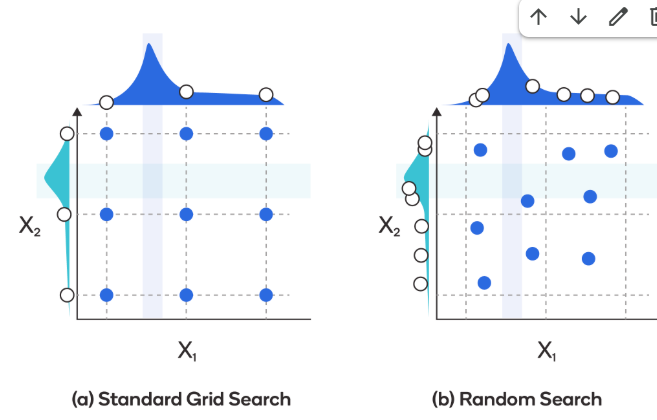

### 1.   **Standard Grid Search**
*   **Grid search** evaluates the model by exhaustively testing **all combinations** of specified hyperparameters.
- In the diagram, the grid shows all the possible combinations of `X1` (horizontal axis) and `X2` (vertical axis) values.
- Blue circles represent the chosen points where the model will be evaluated.
- **Limitations**:
  - It can be inefficient, especially when certain regions of the grid don't yield much improvement.
  - If one dimension (e.g., `X1`) contributes more to the model’s performance, grid search could still waste resources evaluating irrelevant combinations.





###2. **Random Search**:
- **Random search** randomly selects a subset of hyperparameter combinations to evaluate.
- The diagram shows randomly scattered blue points representing randomly selected combinations of `X1` and `X2`.
- **Advantages**:
  - More **efficient** than grid search, especially when not all hyperparameter values are equally important.
  - Allows the algorithm to explore the hyperparameter space more flexibly, often finding optimal values quicker.

### Summary:
- **Grid Search**: Tests all possible combinations systematically but can be computationally expensive.
- **Random Search**: Tests a random subset of hyperparameters, often more efficient for discovering good combinations.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Switch to regressor for continuous targets
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for random search
random_grid = {
    'n_estimators': np.linspace(100, 1000, num=5, dtype=int).tolist(),  # Number of trees in random forest
    'max_features': ['sqrt', 'log2', None],  # Valid options for max_features
    'max_depth': np.linspace(5, 50, num=10, dtype=int).tolist() + [None],  # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [2, 4],  # Min samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Output the created hyperparameter grid
print(f"Random search grid: {random_grid}")

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Perform random search on hyperparameters, using 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model to your data
random_search.fit(X_train, y_train)  # Uncomment and use with appropriate data


On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 5 * 11 * 3 * 2 * 2 * 10 = 6600 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [ ]:
random_search.fit(X_train, y_train)  # Uncomment this when data is available


In [ ]:

random_search.best_params_           # This retrieves the best parameters


In [ ]:
best_random = random_search.best_estimator_
#grid_accuracy = evaluate(best_grid, X_test, y_test)
pred = best_random.predict(X_test)
mean_squared_error(y_test, pred)
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

### **Grid Search with Cross Validation**
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:


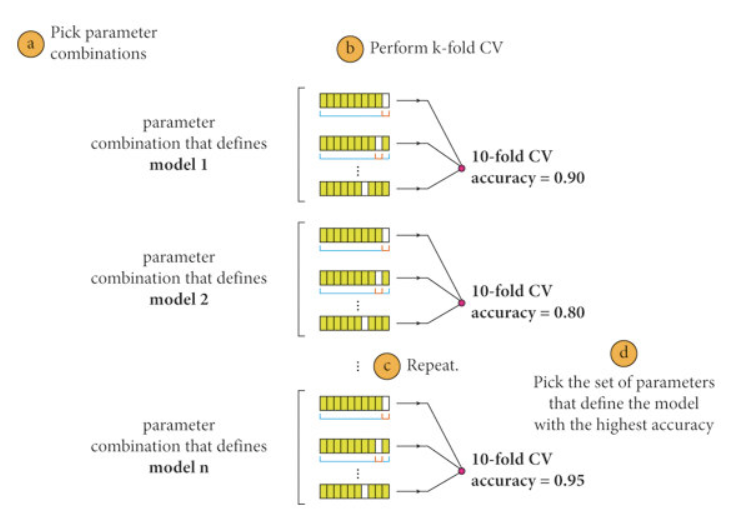

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid based on the random search results or manual selection
param_grid = {
    'bootstrap': [False],  # Only False bootstrap in this grid
    'max_depth': [6, 8, 12],  # Maximum depth of trees
    'max_features': ['sqrt'],  # Number of features to consider at each split
    'min_samples_leaf': [2, 4, 5],  # Minimum samples required at each leaf node
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'n_estimators': [200, 500, 1000]  # Number of trees in the forest
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)  # Adding random_state for reproducibility

# Instantiate the grid search model with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Optionally, fit the model on your training data (you would need to define X_train and y_train)
# grid_search.fit(X_train, y_train)  # Uncomment and use appropriate data


In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
# Best RF model
best_grid = grid_search.best_estimator_
pred = best_grid.predict(X_test)
mean_squared_error(y_test, pred)

### **Boosting**

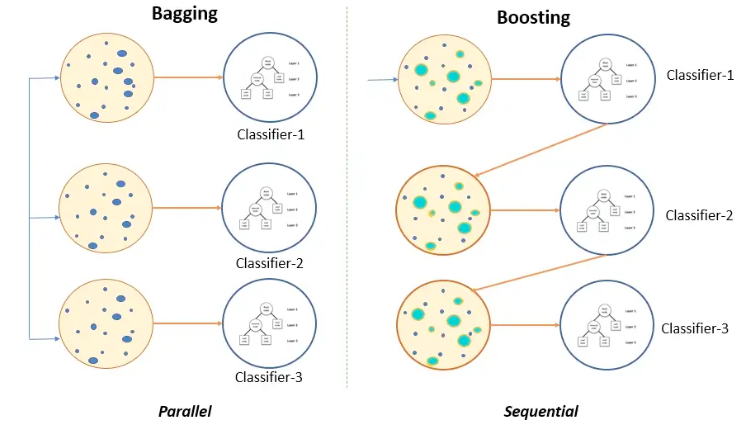

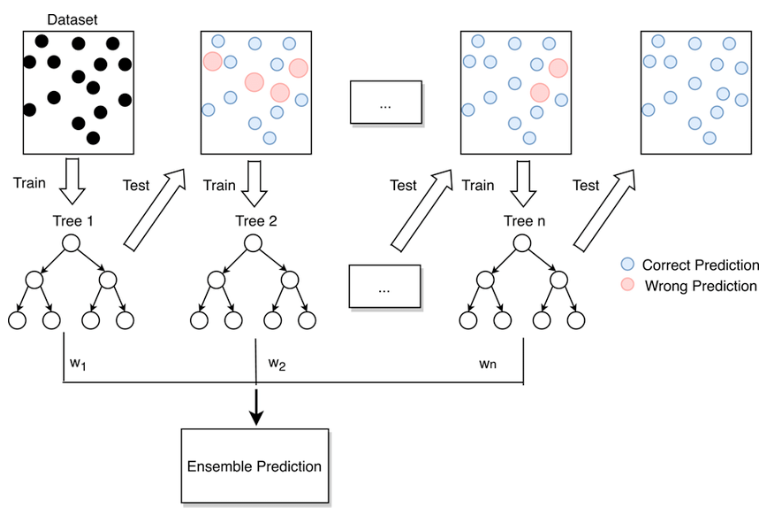

### **Bagging (Bootstrap Aggregating)**

* Parallel: Multiple classifiers are trained independently on different bootstrap samples of the original dataset. These bootstrap samples are created by randomly sampling with replacement from the original data.
* Aggregation: The final prediction is made by combining the predictions of all classifiers, typically through voting or averaging.
* Goal: Reduce variance by averaging the predictions of multiple models.
* Pros: Reduces overfitting, works well with unstable models like decision trees.
* Cons: Can be computationally expensive, especially for large datasets.

### **Boosting**

* Sequential: Classifiers are trained sequentially, with each classifier focusing on the examples that were misclassified by the previous classifiers.
Weighting: The weights of misclassified examples are increased in the next iteration, forcing the next classifier to pay more attention to them.
* Goal: Improve accuracy by iteratively focusing on the difficult examples.
* Pros: Often achieves higher accuracy than Bagging, can handle complex decision boundaries.
* Cons: Can be sensitive to noise in the data, prone to overfitting if not carefully tuned.

### **Key Differences**

* Training: Bagging trains classifiers independently, while Boosting trains them sequentially.
* Sampling: Bagging uses bootstrap sampling, while Boosting doesn't.
* Weighting: Bagging doesn't assign weights to examples, while Boosting does.
* Combination: Bagging combines predictions through voting or averaging, while * Boosting combines predictions based on the weights of classifiers.

In [ ]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

In [ ]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
mean_squared_error(y_test, regr.predict(X_test))